# Comparing my fitted NIG parameters to other code

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pylab as plt
%matplotlib inline

from time import time

import sys
sys.path.append('../')
from bayes_linear_regression import norm_inv_gamma as nig

from scipy.stats import invgamma

## Other NIG model from https://github.com/tonyduan/conjugate-bayes

In [2]:
from models import NIGLinearRegression

### Fitting polynomials

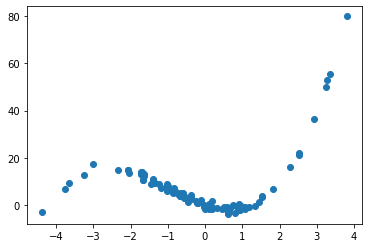

In [5]:
n = 100

A = 1
B = 3

sigma2 = invgamma.rvs(A, loc=0, scale=B, size=1) 
#sigma2 = 0.4
noise = np.random.normal(loc=0, scale=np.sqrt(sigma2), size=n)
noise = np.reshape(noise, (n, 1))

a = -5
b = 3
c = 1
params = (sigma2, a,b,c)

mu = n
X = np.random.normal(loc=0, scale=1.5, size=n).reshape((n, 1))
Y = a * X + b * X**2 + c * X**3 + noise

plt.scatter(X,Y)
plt.show()

### My model

In [6]:
explanatory = np.hstack((X, X**2, X**3))
#explanatory = np.hstack((X, X**2))
cov = np.eye(3)
mu = np.zeros(shape=(3, 1)) # nvars plus 1 because first 'mu' is the intercept

# Instantiate the model
prior = nig.NormalInverseGamma(a=A, b=B, mu=mu, cov=cov)
# Fit the model
post = nig.PostNormalInverseGamma(prior, explanatory, Y)

In [7]:
print('Sigma2 mean = ', post.b / (post.a - 1))
print('Beta means = ',post.mu.flatten())

Sigma2 mean =  1.3658567347036297
Beta means =  [-5.04555087  3.04694393  1.00929892]


### Other model

In [8]:
model = NIGLinearRegression(mu=mu.flatten(), v=cov, a=A, b=B)
model.fit(explanatory, Y.flatten())

In [9]:
sigma2 = model.get_marginal_sigma2()
beta = model.get_conditional_beta(sigma2.mean())
print('Sigma2 mean = ', sigma2.mean())
print('Beta means = ', beta.mean)

Sigma2 mean =  1.365856734703626
Beta means =  [-5.04555087  3.04694393  1.00929892]


They match up extremely well